# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [68]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [69]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv", header=0)
inp0.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [70]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [71]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [72]:
#Check the number of null values in the columns
inp0.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [73]:
#Check if your dataframe is having any infinite/inf value or not
ds = inp0.isin([np.inf, -np.inf])
print(ds)

#find total number of inf values
#count = np.isinf(inp0).values.sum()
#count

         App  Category  Rating  Reviews   Size  Installs   Type  Price  \
0      False     False   False    False  False     False  False  False   
1      False     False   False    False  False     False  False  False   
2      False     False   False    False  False     False  False  False   
3      False     False   False    False  False     False  False  False   
4      False     False   False    False  False     False  False  False   
...      ...       ...     ...      ...    ...       ...    ...    ...   
10836  False     False   False    False  False     False  False  False   
10837  False     False   False    False  False     False  False  False   
10838  False     False   False    False  False     False  False  False   
10839  False     False   False    False  False     False  False  False   
10840  False     False   False    False  False     False  False  False   

       Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0               False   False         F

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [74]:
#Drop the rows having null values in the Rating field
inp0.dropna(subset=['Rating'], inplace=True)

#Check the shape of the dataframe
inp0.shape

(9367, 13)

In [75]:
# Check the number of nulls in the Rating field again to cross-verify
inp0['Rating'].isna().sum()

0

In [76]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp0.isna().sum().sum()

8

In [77]:
#Inspect the nulls in the Android Version column
inp0['Android Ver'].isna().sum()

3

In [78]:
#get only those rows where Android Cersion column is having null/missing values
inp0[inp0['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [79]:
#Drop the row having shifted values
inp0 = inp0[-((inp0['Android Ver'].isnull()) & (inp0['Category']=="1.9"))]

#Check the nulls againin Android version column to cross-verify
inp0[inp0['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [80]:
#Check the most common value in the Android version column
inp0['Android Ver'].value_counts()

#find mode of specific column vlues
inp0['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [81]:
#Fill up the nulls in the Android Version column with the above value
inp0['Android Ver'] = inp0['Android Ver'].fillna(inp0['Android Ver'].mode()[0])

In [82]:
#Check the nulls in the Android version column again to cross-verify
inp0['Android Ver'].isnull().sum()

0

In [83]:
#Check the nulls in the entire dataframe again
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [84]:
#Check the most common value in the Current version column
inp0['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [85]:
#Replace the nulls in the Current version column with the above value

inp0['Current Ver'] = inp0['Current Ver'].fillna(inp0['Current Ver'].mode()[0])

In [86]:
# Question : Check the most common value in the Current version column again
inp0['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [87]:
#Check the datatypes of all the columns 
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [88]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp0.Price.value_counts()
inp0[inp0['Price']==''].count()
#Analyse the Price column to check the issue
##Pice column is having $values and blank values as well
#Write the function to make the changes
inp0['Price'] = inp0.Price.apply(lambda x: 0 if x=="0" else (0 if x=='' else float(x[1:])))
inp0.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type  Price Content Rating  \
0     159  19000.0      10,000+  Free    0.0       Everyone   
1     967  14000.0     500,000+  Free    0.0       Everyone   
2   87510   8700.0   5,000,000+  Free    0.0       Everyone   
3  215644  25000.0  50,000,000+  Free    0.0           Teen   
4     967   2800.0     100,000+  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [89]:
#Verify the dtype of Price once again
inp0.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [90]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"

priceColumn = inp0[inp0['Android Ver']=="4.1 and up"]['Price']
priceColumn.mean()

0.819160601649685

In [91]:
#Analyse the Reviews column
inp0.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [92]:
#Change the dtype of this column
inp0.Reviews = inp0.Reviews.astype("int32")

#Check the quantitative spread of this dataframe

inp0.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [93]:
#Analyse the Installs Column
inp0.Installs.value_counts()


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [94]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
#inp0.Installs = inp0.Installs.apply(lambda x: x.replace(',','')).apply(lambda y: y.replace('+',''))
inp0.Installs.value_counts()
inp0.Installs = inp0.Installs.astype("int32")
inp0.Installs.quantile(0.5)

500000.0

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [95]:
#Perform the sanity checks on the Rating column
inp0.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [96]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


In [97]:
##Number of Reviews is less than or equal to the number of Installs.
##Number of Reviews should not be greater than number of installs
inp0[inp0.Reviews>inp0.Installs]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [98]:
##Remove rows where no of Reviews are greater than no of Installs
inp0 = inp0[inp0.Reviews<=inp0.Installs]
inp0.shape

(9359, 13)

In [99]:
#perform the sanity checks on prices of free apps 
inp0[(inp0['Type']=="Free") & (inp0['Price']>0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [100]:
#import the plotting libraries

import matplotlib.pyplot as plt

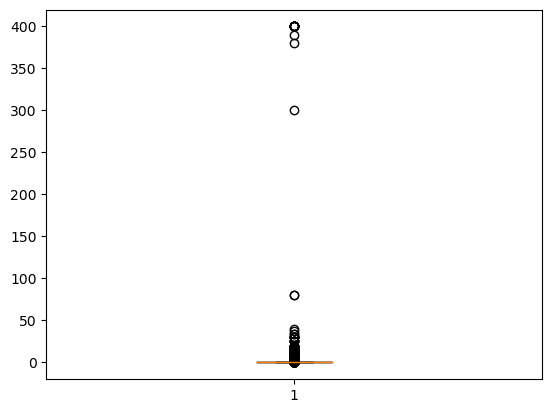

In [101]:
#Create a box plot for the price column
plt.boxplot(inp0.Price)
plt.show()

In [102]:
iqr = inp0.Price.quantile(0.75)-inp0.Price.quantile(0.25)
iqr

0.0

In [103]:
#Check the apps with price more than 200
inp0.App[inp0.Price>200]

4197            most expensive app (H)
4362                        💎 I'm rich
4367          I'm Rich - Trump Edition
5351                         I am rich
5354                    I am Rich Plus
5355                     I am rich VIP
5356                 I Am Rich Premium
5357               I am extremely Rich
5358                        I am Rich!
5359                I am rich(premium)
5362                     I Am Rich Pro
5364    I am rich (Most expensive app)
5366                         I Am Rich
5369                         I am Rich
5373                I AM RICH PRO PLUS
Name: App, dtype: object

In [104]:
#Clean the Price column
inp0 = inp0[inp0.Price<=200]

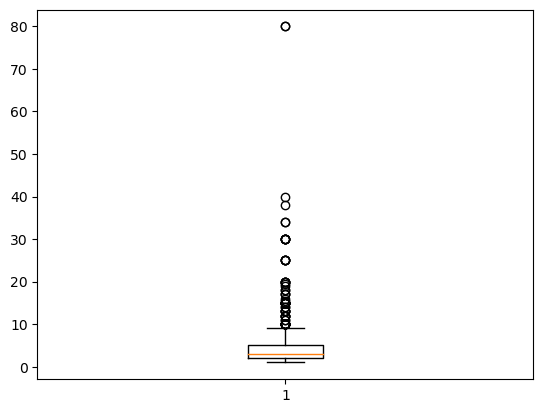

In [105]:
#Create a box plot for paid apps
paidApps = inp0.Price[inp0.Price>0]
plt.boxplot(paidApps)
plt.show()

In [106]:
#Check the apps with price more than 30
appsPrice30above = inp0[inp0.Price>30]
appsPrice30above

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

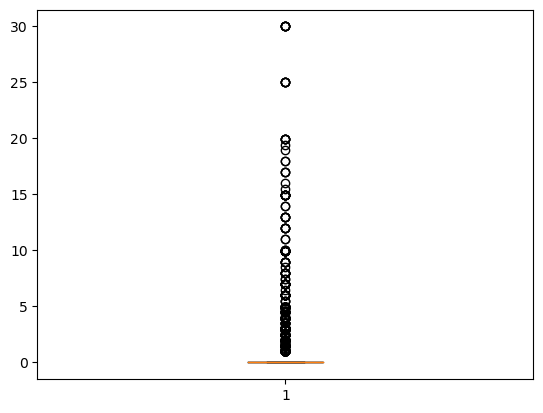

In [107]:
#Clean the Price column again
inp0 = inp0[inp0.Price<30]
inp0.shape
plt.boxplot(inp0.Price)
plt.show()

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

(array([9.212e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

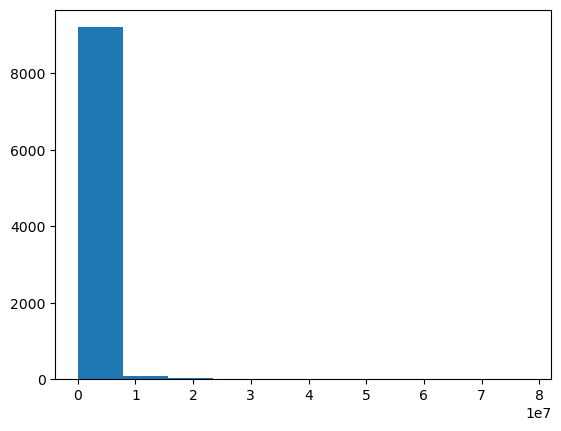

In [108]:
#Create a histogram of the Reviews
plt.hist(inp0.Reviews)

{'whiskers': [<matplotlib.lines.Line2D at 0x21c5e6d2fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c5e6f25b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c5e6d2df0>],
 'medians': [<matplotlib.lines.Line2D at 0x21c5e6f2b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c5e6f2e20>],
 'means': []}

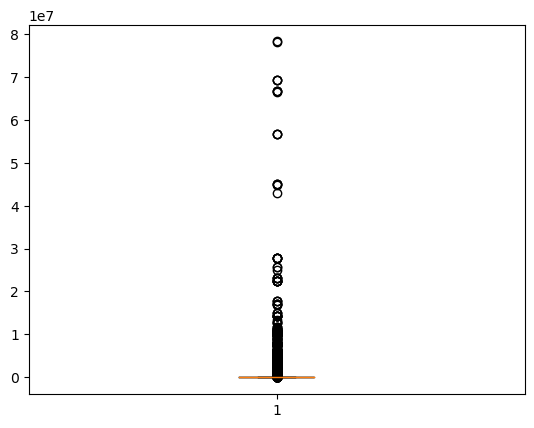

In [109]:
#Create a boxplot of the Reviews column
plt.boxplot(inp0.Reviews)


In [110]:
#Check records with 1 million reviews
inp0[inp0.Reviews>1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [111]:
#Drop the above records

inp0 = inp0[inp0.Reviews<=1000000]
inp0.shape

(8634, 13)

(array([7168.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

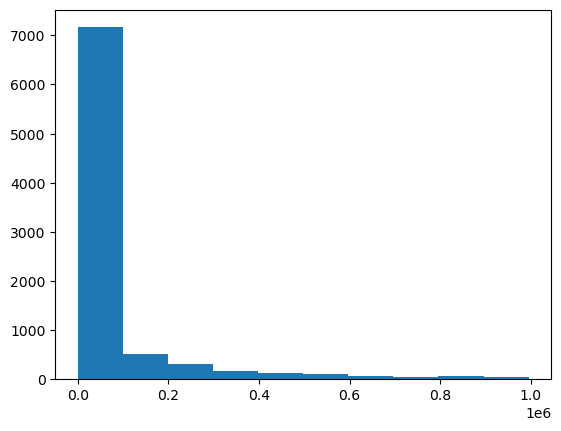

In [112]:
#Question - Create a histogram again and check the peaks

plt.hist(inp0.Reviews)

{'whiskers': [<matplotlib.lines.Line2D at 0x21c5eb1f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c5eb1fd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c5eb1f610>],
 'medians': [<matplotlib.lines.Line2D at 0x21c5eb2b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c5eb2b610>],
 'means': []}

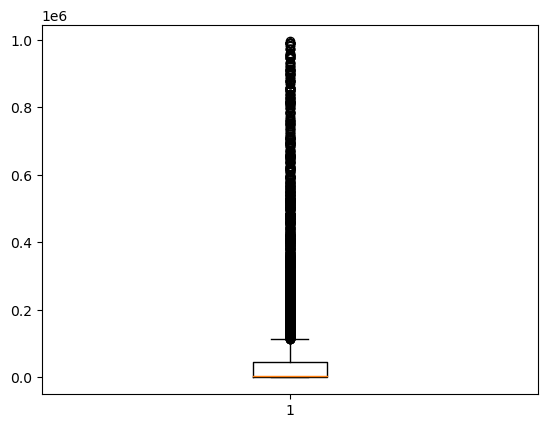

In [113]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp0.Reviews)

In [114]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp0 = inp0[inp0.Installs<=100000000]
inp0.shape

(8624, 13)

(array([8435.,    0.,    0.,    0.,  138.,    0.,    0.,    0.,    0.,
          51.]),
 array([5.00000000e+00, 1.00000045e+07, 2.00000040e+07, 3.00000035e+07,
        4.00000030e+07, 5.00000025e+07, 6.00000020e+07, 7.00000015e+07,
        8.00000010e+07, 9.00000005e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

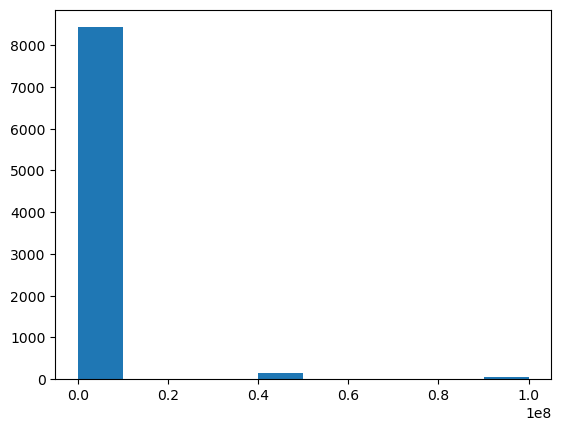

In [115]:
#Plot a histogram for Size as well.
plt.hist(inp0.Installs)

(array([3218., 1355., 2224.,  564.,  426.,  271.,  177.,  126.,  106.,
         157.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

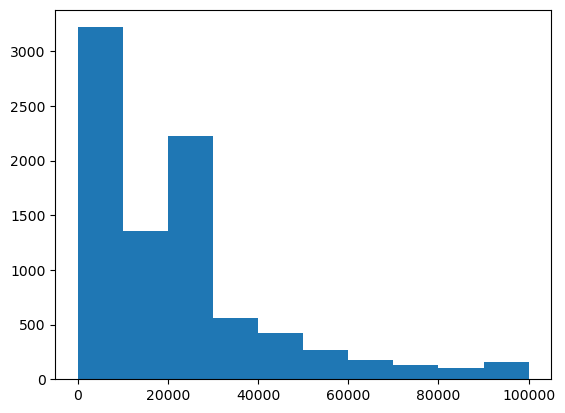

In [116]:
#Question - Create a boxplot for the Size column and report back the median value
plt.hist(inp0.Size)

In [117]:
##IQL for Install Column
inp0.Installs.quantile(0.75)-inp0.Installs.quantile(0.25)

990000.0

{'whiskers': [<matplotlib.lines.Line2D at 0x21c5e9e4df0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c5eb443d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c5e9d4a00>],
 'medians': [<matplotlib.lines.Line2D at 0x21c5eb44970>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c5eb44c40>],
 'means': []}

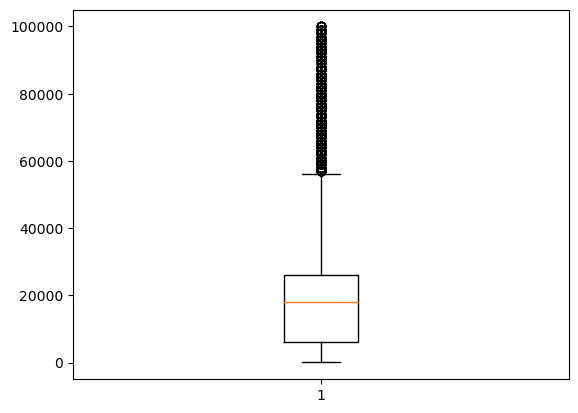

In [118]:
plt.boxplot(inp0.Size)

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [122]:
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

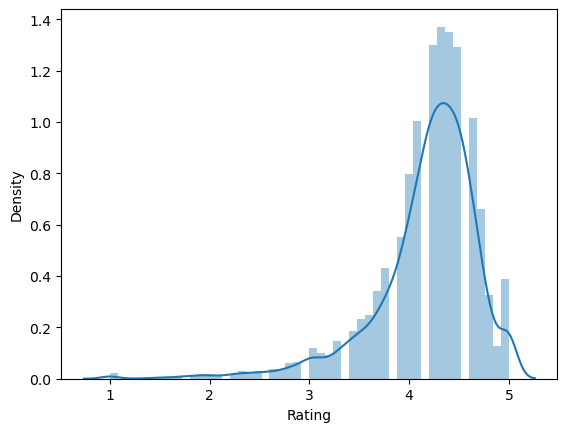

In [125]:
#Create a distribution plot with probability distribution curve for rating
sns.distplot(inp0.Rating)
plt.show()

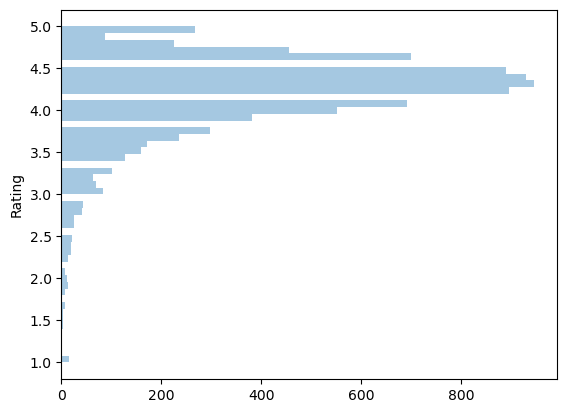

In [128]:
#Create a distribution plot without probability distribution curve for rating
#?sns.distplot
sns.distplot(inp0.Rating,kde=False, vertical=True)
plt.show()

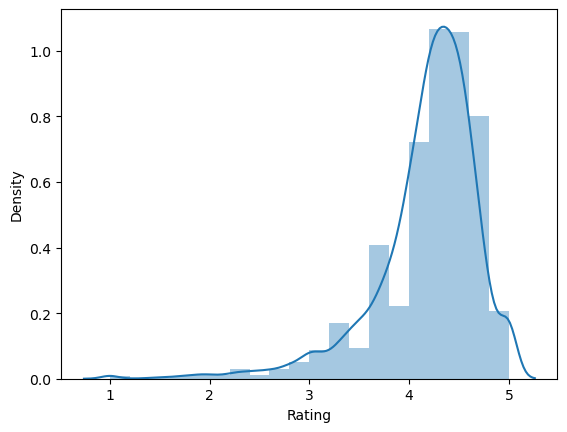

In [129]:
#Change the number of bins
sns.distplot(inp0.Rating,bins=20)
plt.show()


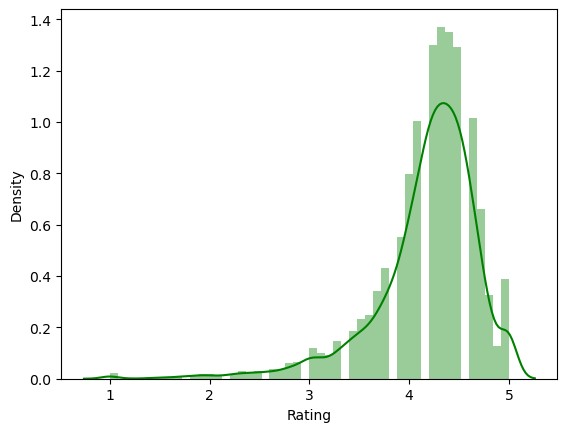

In [131]:
#Change the colour of bins to green
sns.distplot(inp0.Rating, color='g')
plt.show()

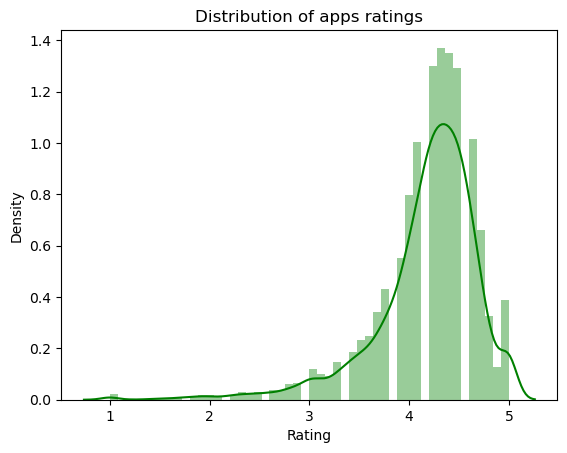

In [132]:
#Apply matplotlib functionalities
sns.distplot(inp0.Rating, color='g')
plt.title("Distribution of apps ratings", fontsize=12)
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

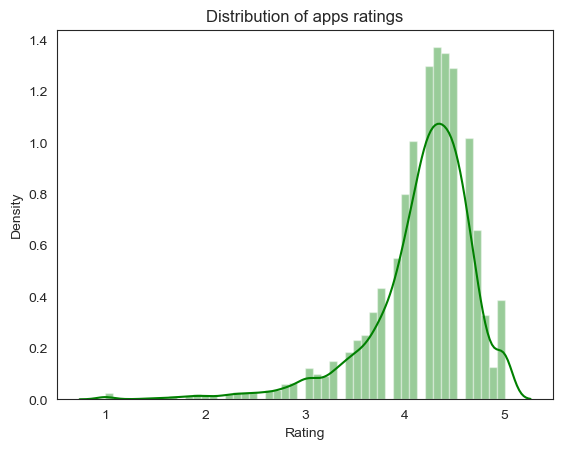

In [137]:
#Check all the styling options
sns.set_style("white")
sns.distplot(inp0.Rating, color='g')
plt.title("Distribution of apps ratings", fontsize=12)
plt.show()

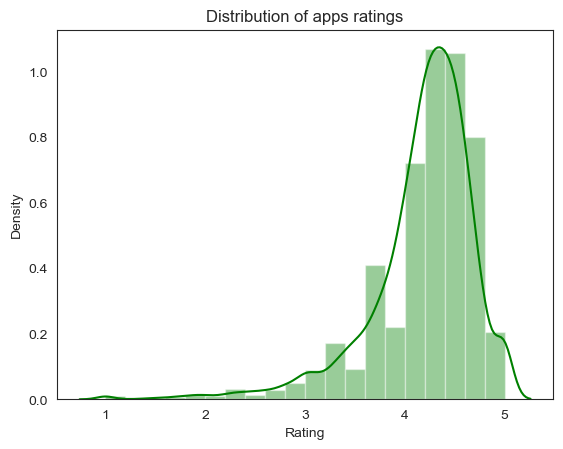

In [138]:
#Change the number of bins to 20
sns.set_style("white")
sns.distplot(inp0.Rating, color='g', bins=20)
plt.title("Distribution of apps ratings", fontsize=12)
plt.show()

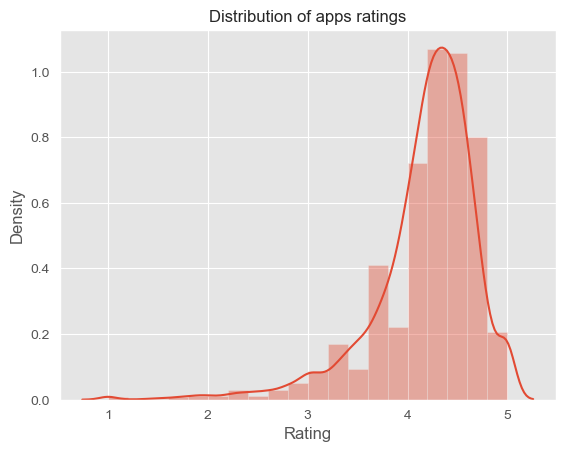

In [142]:
##Adding theme.style

plt.style.use("ggplot")
sns.distplot(inp0.Rating, bins=20)
plt.title("Distribution of apps ratings", fontsize=12)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [144]:
#Analyse the Content Rating column
inp0['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [152]:
#Remove the rows with values which are less represented 
inp0 = inp0[~inp0['Content Rating'].isin(["Adults only 18+", "Unrated"])]
inp0.shape

(8620, 13)

In [153]:
#Reset the index
inp0.reset_index(inplace=True)

In [154]:
#Check the apps belonging to different categories of Content Rating 
inp0['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

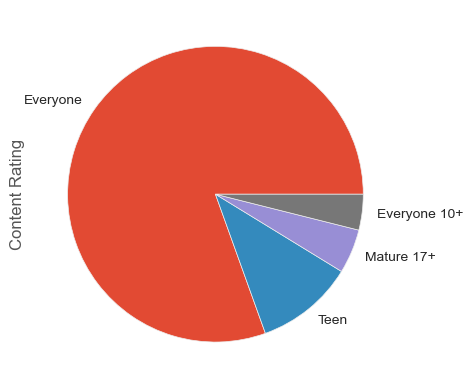

In [156]:
#Plot a pie chart
inp0['Content Rating'].value_counts().plot.pie()


<AxesSubplot:>

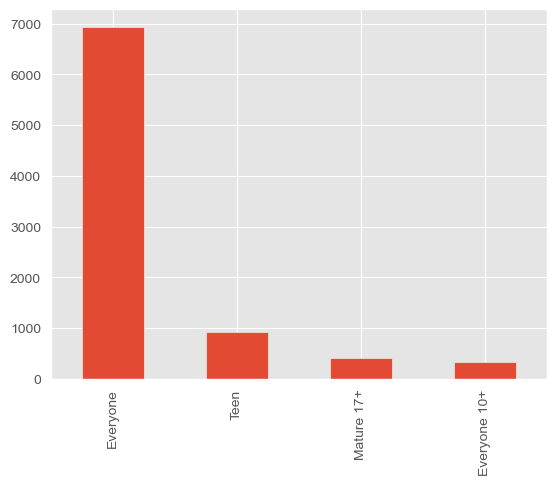

In [157]:
#Plot a bar chart
inp0['Content Rating'].value_counts().plot.bar()

<AxesSubplot:>

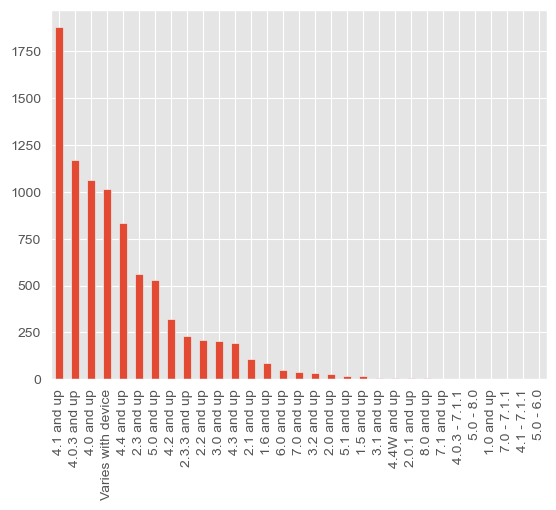

In [160]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp0['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

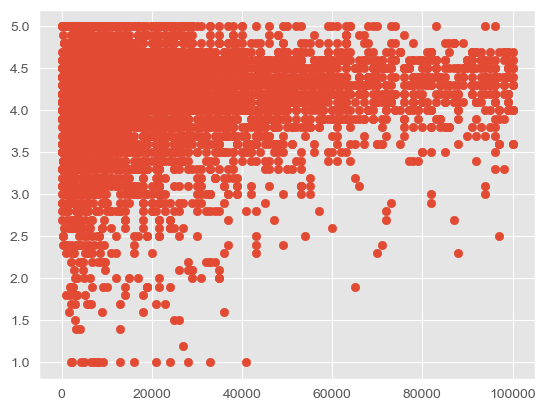

In [161]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp0.Size, inp0.Rating)

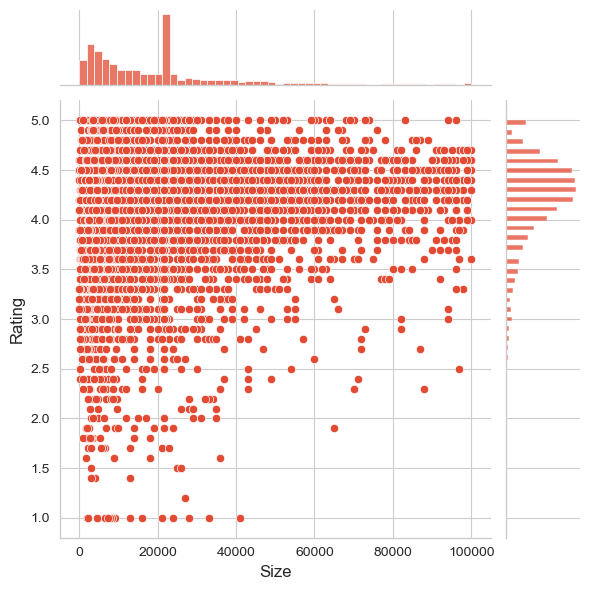

In [171]:
### Plot the same thing now using a jointplot
sns.set_style("whitegrid")
sns.jointplot(inp0.Size, inp0.Rating)

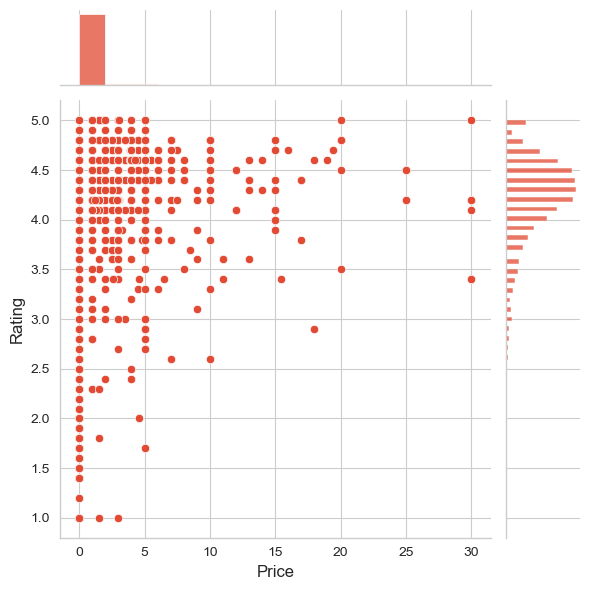

In [172]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp0.Price, inp0.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

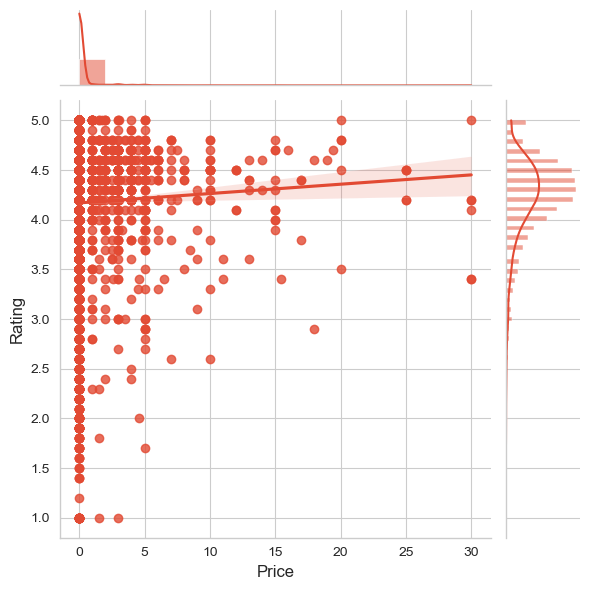

In [173]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(inp0.Price, inp0.Rating, kind='reg')
plt.show()

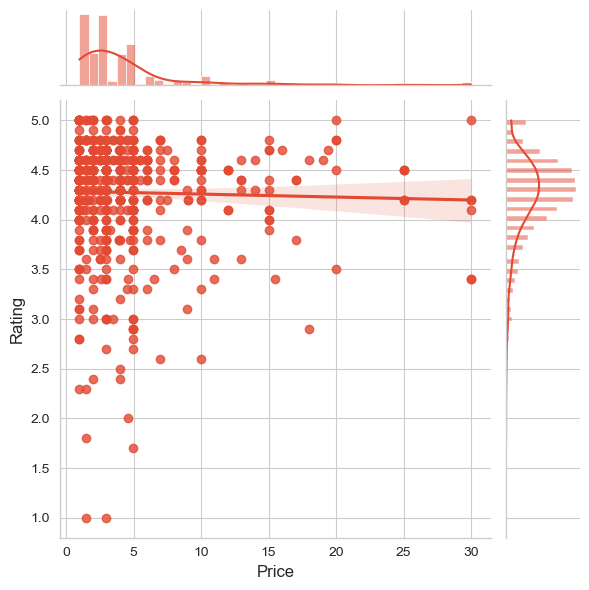

In [174]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(inp0.Price[inp0.Price>0], inp0.Rating, kind='reg')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

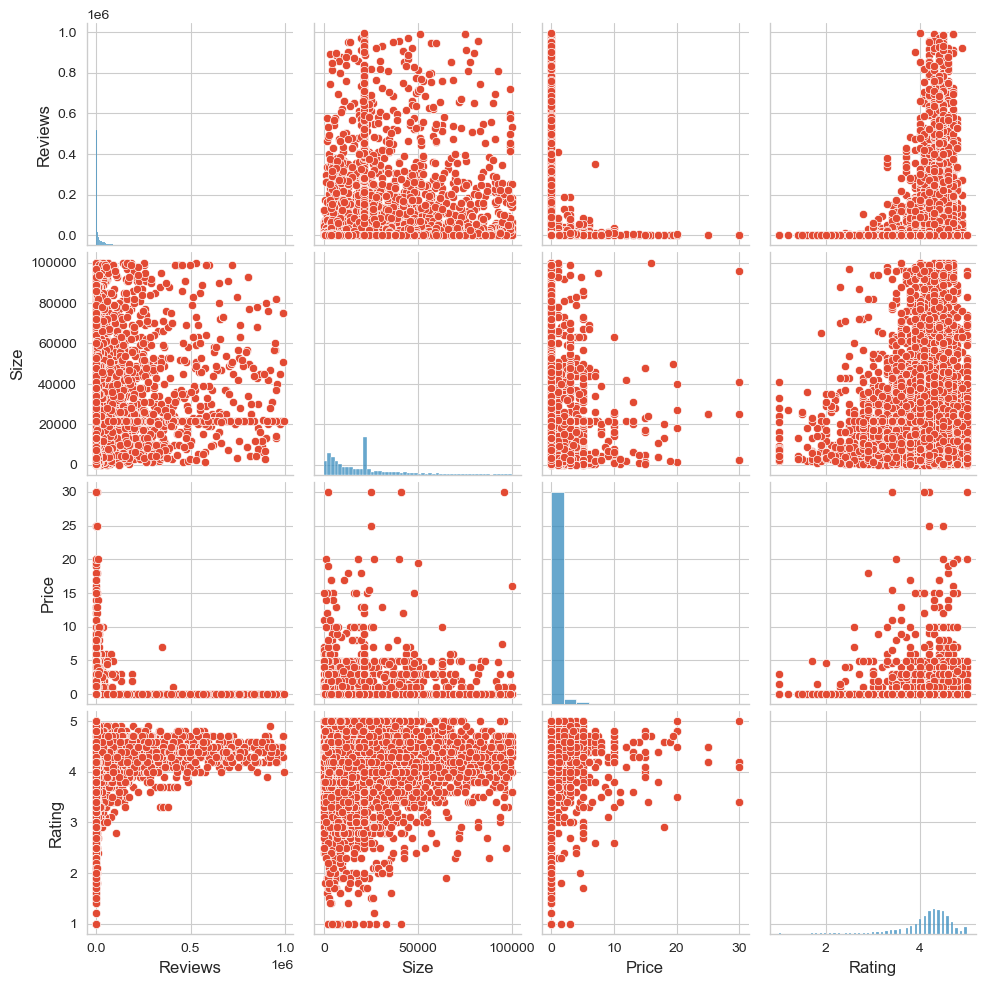

In [175]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp0[['Reviews','Size', 'Price', 'Rating']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

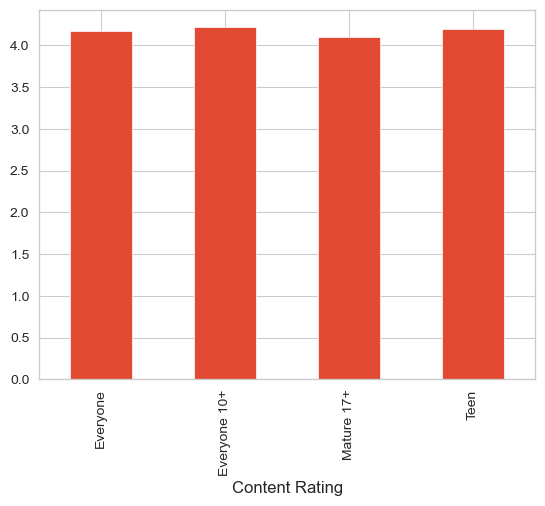

In [178]:
##Plot a bar plot of Content Rating vs Average Rating 
inp0.groupby(by=inp0['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

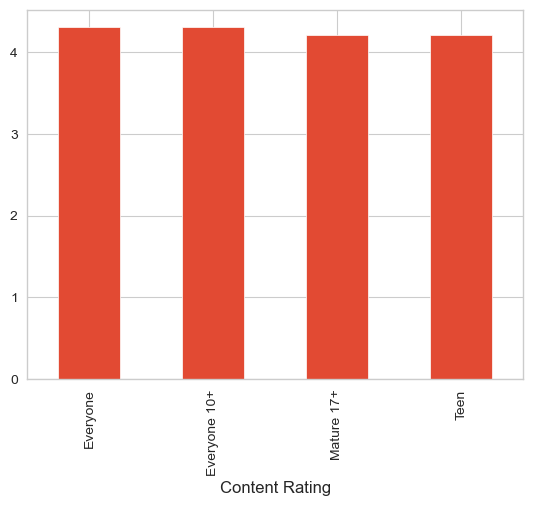

In [179]:
##Plot the bar plot again with Median Rating
inp0.groupby(by=inp0['Content Rating'])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

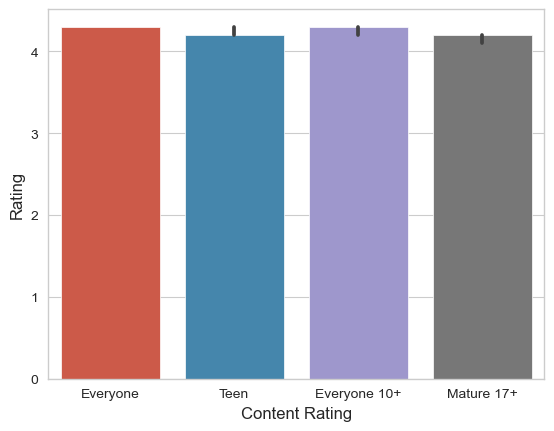

In [180]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp0, x='Content Rating', y='Rating', estimator=np.median)


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

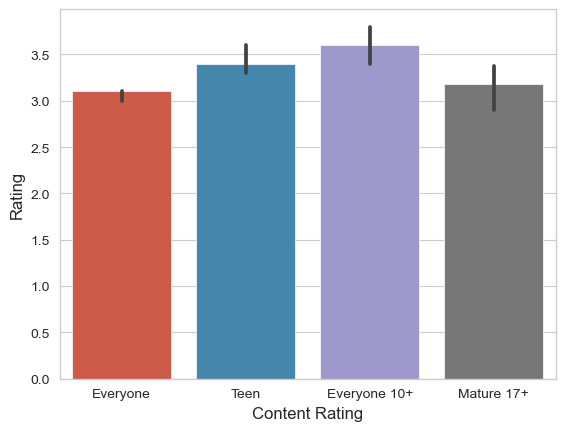

In [182]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp0, x='Content Rating', y='Rating', estimator=lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

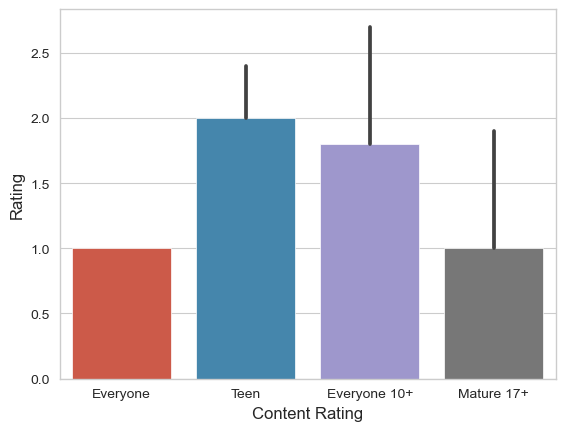

In [183]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp0, x='Content Rating', y='Rating', estimator=np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




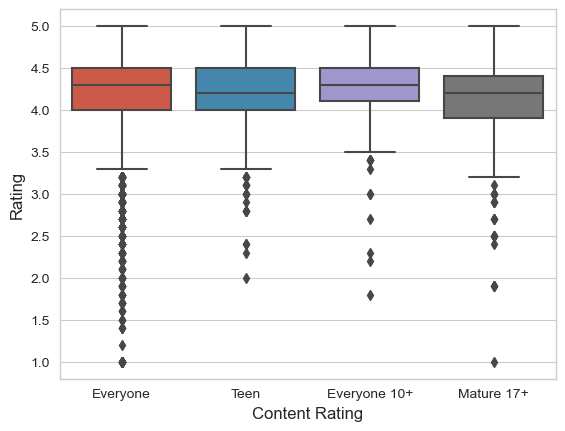

In [184]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(inp0['Content Rating'],inp0.Rating)
plt.show()

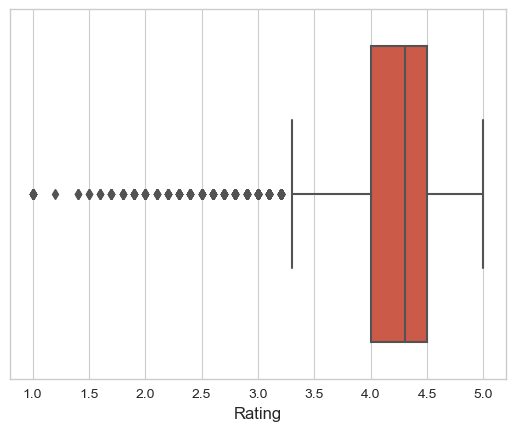

In [185]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp0.Rating)
plt.show()

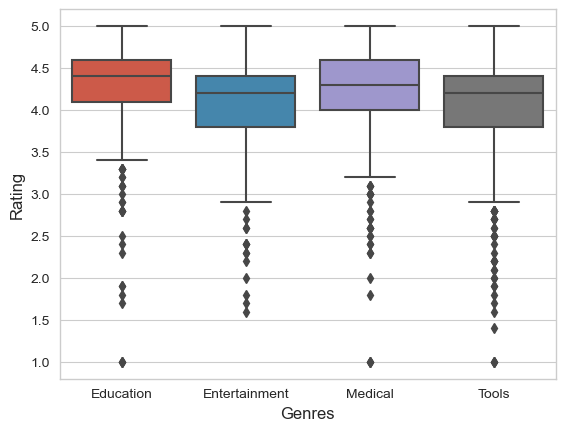

In [190]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp0.columns
inp0.Genres.value_counts()

most_popular_genres_df = inp0[inp0.Genres.isin(['Tools','Entertainment','Education','Medical'])]
most_popular_genres_df

sns.boxplot(most_popular_genres_df['Genres'],most_popular_genres_df.Rating)
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [194]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp0['Bucket_size'] = pd.qcut(inp0.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'])
inp0.head()

index                                                App        Category  \
0      0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1      1                                Coloring book moana  ART_AND_DESIGN   
2      2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3      3                              Sketch - Draw & Paint  ART_AND_DESIGN   
4      4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   

   Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0     4.1      159  19000.0     10000  Free    0.0       Everyone   
1     3.9      967  14000.0    500000  Free    0.0       Everyone   
2     4.7    87510   8700.0   5000000  Free    0.0       Everyone   
3     4.5   215644  25000.0  50000000  Free    0.0           Teen   
4     4.3      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Bucket_size  
0  4.0.3 and up           M  
1  4.0.3 and up           M  
2  4.0.3 and up           L  
3    4.2 and up           H  
4    4.4 and up          VL

In [195]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp0, index="Content Rating", columns="Bucket_size", values="Rating")

Bucket_size           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215784  4.170799  4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.143310  4.198131  4.246154

In [197]:
##Change the aggregation to median
pd.pivot_table(data=inp0, index="Content Rating", columns="Bucket_size", values="Rating", aggfunc=np.median)

Bucket_size       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [198]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp0, index="Content Rating", columns="Bucket_size", values="Rating", aggfunc=lambda x: np.quantile(x,0.20))

Bucket_size       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In [199]:
##Store the pivot table in a separate variable
heatmap_data = pd.pivot_table(data=inp0, index="Content Rating", columns="Bucket_size", values="Rating", aggfunc=lambda x: np.quantile(x,0.20))

<AxesSubplot:xlabel='Bucket_size', ylabel='Content Rating'>

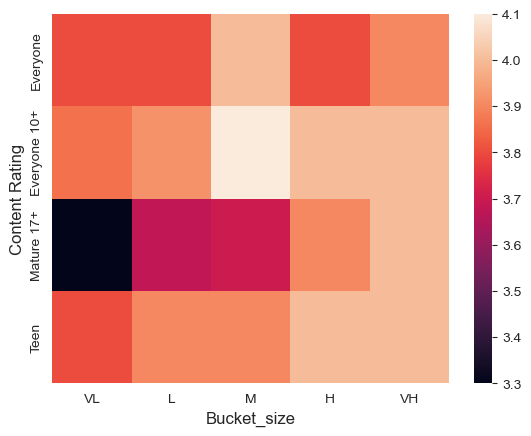

In [200]:
##Plot a heat map
sns.heatmap(heatmap_data)

<AxesSubplot:xlabel='Bucket_size', ylabel='Content Rating'>

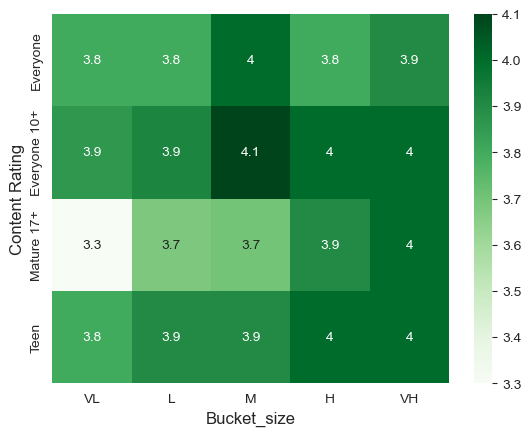

In [203]:
##Apply customisations
sns.heatmap(heatmap_data, cmap="Greens", annot=True)

In [208]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp0['Review_buckets'] = pd.qcut(inp0.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good'])
inp0.head()
heatmap_data1 = pd.pivot_table(data=inp0, index="Review_buckets", columns="Bucket_size", values="Rating", aggfunc=np.min)

<AxesSubplot:xlabel='Bucket_size', ylabel='Review_buckets'>

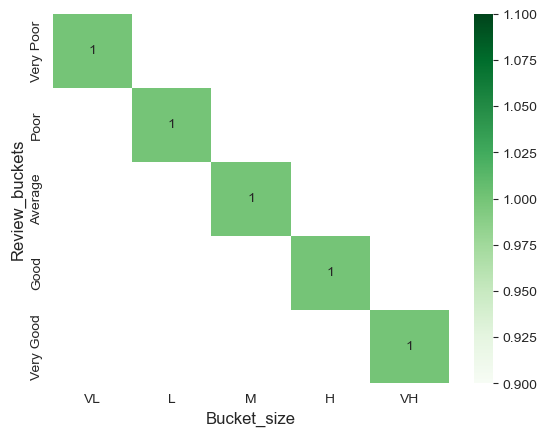

In [209]:
##Generate heatmap
sns.heatmap(heatmap_data1, cmap="Greens", annot=True)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [210]:
## Extract the month from the Last Updated Date
inp0['Last_Updated_Month'] = pd.to_datetime(inp0['Last Updated']).dt.month
inp0.head()

index                                                App        Category  \
0      0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1      1                                Coloring book moana  ART_AND_DESIGN   
2      2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3      3                              Sketch - Draw & Paint  ART_AND_DESIGN   
4      4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   

   Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0     4.1      159  19000.0     10000  Free    0.0       Everyone   
1     3.9      967  14000.0    500000  Free    0.0       Everyone   
2     4.7    87510   8700.0   5000000  Free    0.0       Everyone   
3     4.5   215644  25000.0  50000000  Free    0.0           Teen   
4     4.3      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Bucket_size Bucket_Reviews Review_buckets  Last_Updated_Month  
0  4.0.3 and up           M        Average        Average                   1  
1  4.0.3 and up           M        Average        Average                   1  
2  4.0.3 and up           L           Poor           Poor                   8  
3    4.2 and up           H           Good           Good                   6  
4    4.4 and up          VL      Very Poor      Very Poor                   6

In [212]:
## Find the average Rating across all the months

inp0.groupby(by="Last_Updated_Month")['Rating'].mean()

Last_Updated_Month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

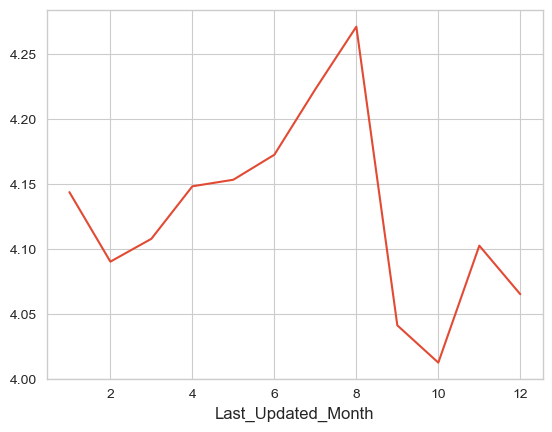

In [214]:
## Plot a line graph

inp0.groupby(by="Last_Updated_Month")['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [224]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp0, columns="Content Rating", index="Last_Updated_Month", values='Installs', aggfunc=sum)

Content Rating          Everyone  Everyone 10+   Mature 17+          Teen
Last_Updated_Month                                                       
1                   9.253874e+08   105282000.0    9701210.0  4.415901e+07
2                   5.453720e+08    19821000.0   13021500.0  3.959771e+07
3                   6.953655e+08    30322510.0    9111100.0  7.985031e+07
4                   9.733712e+08    23300000.0    5259000.0  1.616194e+08
5                   1.861068e+09   118173500.0   50140100.0  2.026896e+08
6                   2.427171e+09   317727100.0  145257200.0  4.157166e+08
7                   7.771110e+09   456556000.0  419491910.0  1.943557e+09
8                   5.930943e+09   215821000.0  312981700.0  1.257856e+09
9                   2.603404e+08    24931100.0    2201010.0  2.248310e+07
10                  2.582797e+08    23101000.0    3160000.0  4.562921e+07
11                  6.254247e+08    60310000.0    1070100.0  3.126110e+07
12                  5.671058e+08     8410000.0   12960100.0  5.170710e+07

In [225]:
##Store the table in a separate variable
monthly_install = pd.pivot_table(data=inp0, columns="Content Rating", index="Last_Updated_Month", values='Installs', aggfunc=sum)

<AxesSubplot:xlabel='Last_Updated_Month'>

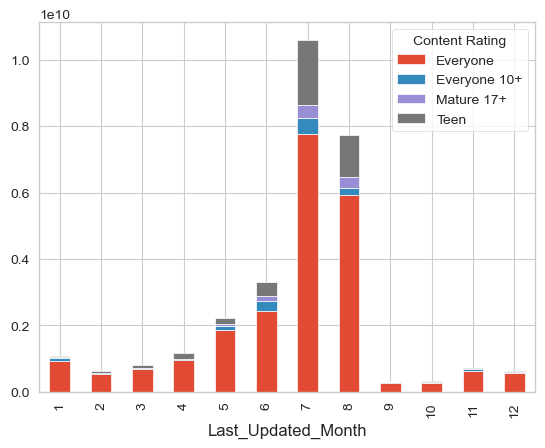

In [226]:
##Plot the stacked bar chart.

monthly_install.plot(kind="bar", stacked=True)

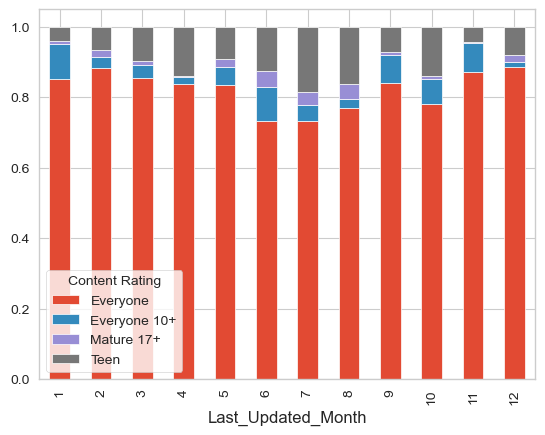

In [231]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_install_proportion = monthly_install[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(), axis=1)
monthly_install_proportion.plot(kind="bar", stacked=True)
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [232]:
#Install plotly
import plotly.express as px

In [243]:
#Take the table you want to plot in a separate variable
result = inp0.groupby(["Last_Updated_Month"])[["Rating"]].mean()
result.reset_index(inplace=True)

In [244]:
#Import the plotly libraries
import plotly.express as px

result.columns

Index(['Last_Updated_Month', 'Rating'], dtype='object')

In [245]:
#Prepare the plot
fig = px.line(result, x="Last_Updated_Month", y="Rating")
fig.show()